# Partial object shape completion

In [1]:
from utils.util_3d import init_mesh_renderer, sdf_to_mesh, add_mesh_textures
from utils.qual_util import get_partial_shape_by_range
from utils.qual_util import save_mesh_as_gif
import os
import torch
from IPython.display import Image as ipy_image
from utils.demo_util import get_shape_comp_opt
from utils.demo_util import get_shape_comp_model

""" setup dir """
res_dir = 'results'
if not os.path.exists(res_dir): os.mkdir(res_dir)

""" setup opt"""
gpu_id = 0

opt = get_shape_comp_opt(gpu_id=gpu_id)

""" setup different model """
model = get_shape_comp_model(opt)    
model.eval()

""" setup renderer """
dist, elev, azim = 1.7, 20, 110
mesh_renderer = init_mesh_renderer(image_size=256, dist=dist, elev=elev, azim=azim, device=opt.device)

jvermandere
gpuserver-0.geomatics.kuleuven.be
[*] Enc has Attn at i_level, i_block: 3, 0
Working with z of shape (1, 256, 8, 8, 8) = 131072 dimensions.
[*] Dec has Attn at i_level, i_block: 3, 0
[*] VQVAE: weight successfully load from: saved_ckpt/pvqvae-snet-all-LR1e-4-T0.2-rerun-epoch140.pth
[*] Model has been created: Rand-Transformer-Model
[*] "rand_tf" initialized.
[*] weight successfully load from: saved_ckpt/rand_tf-snet_code-all-LR1e-4-clean-epoch200.pth


In [2]:

#sdf = model.uncond_gen(bs=1, topk=31)
sdf = torch.load('./demo_data/voxelChair copy.pt',map_location=torch.device('cuda'))
print(sdf)

FileNotFoundError: [Errno 2] No such file or directory: './demo_data/voxelChair copy.pt'

torch.Size([1, 1, 64, 64, 64])


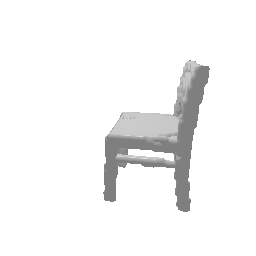

In [24]:
gen_sdf_as_mesh = sdf_to_mesh(sdf)
print (sdf.shape)
# save as gif
gif_name = f'{res_dir}/shape-example.gif'
save_mesh_as_gif(mesh_renderer, gen_sdf_as_mesh, nrow=1, out_name=gif_name)
ipy_image(gif_name)

In [25]:
min_x, max_x = -1., 0.
min_y, max_y = -1., 1.
min_z, max_z = -1., 1.
input_range = {'x1': min_x, 'x2': max_x, 'y1': min_y, 'y2': max_y, 'z1': min_z, 'z2': max_z}

shape_comp_input = get_partial_shape_by_range(sdf, input_range)
print(shape_comp_input)

[*] autoregressively inferencing...: 100%|██████████| 256/256 [00:11<00:00, 21.65it/s]


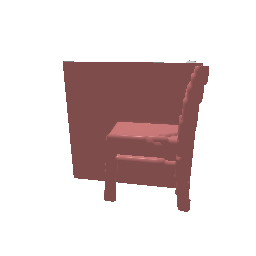

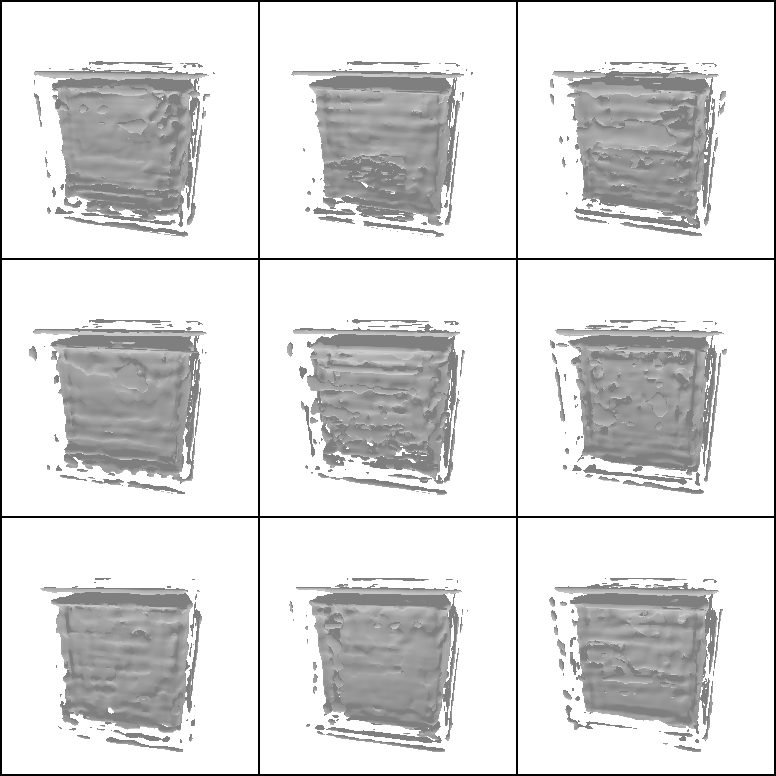

In [26]:
""" perform shape completion """
input_mesh, comp_sdf = model.shape_comp(shape_comp_input, bs=9, topk=30)

gen_mesh = sdf_to_mesh(comp_sdf)          # completed shape

# save as gif
gif_name = f'{res_dir}/shape-comp-struct-input-inp.gif'
save_mesh_as_gif(mesh_renderer, input_mesh, nrow=1, out_name=gif_name)

gen_gif_name = f'{res_dir}/shape-comp-struct-input-gen.gif'
save_mesh_as_gif(mesh_renderer, gen_mesh, nrow=3, out_name=gen_gif_name)

for name in [gif_name, gen_gif_name]:
    display(ipy_image(name))